In [93]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import pearsonr
import openpyxl
import h5py
import pandas as pd
import random
import scipy.io

import numpy as np
import pandas as pd
import gzip
import h5py
import openpyxl
import random
import scipy.io
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.stats import pearsonr
import openpyxl
import h5py
import pandas as pd
import random
import scipy.io
import json
import requests
import matplotlib.colors as colors
import seaborn as sns
import time
from matplotlib.ticker import MaxNLocator
from IPython.display import display, FileLink, HTML, Markdown
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from scipy.stats import zscore

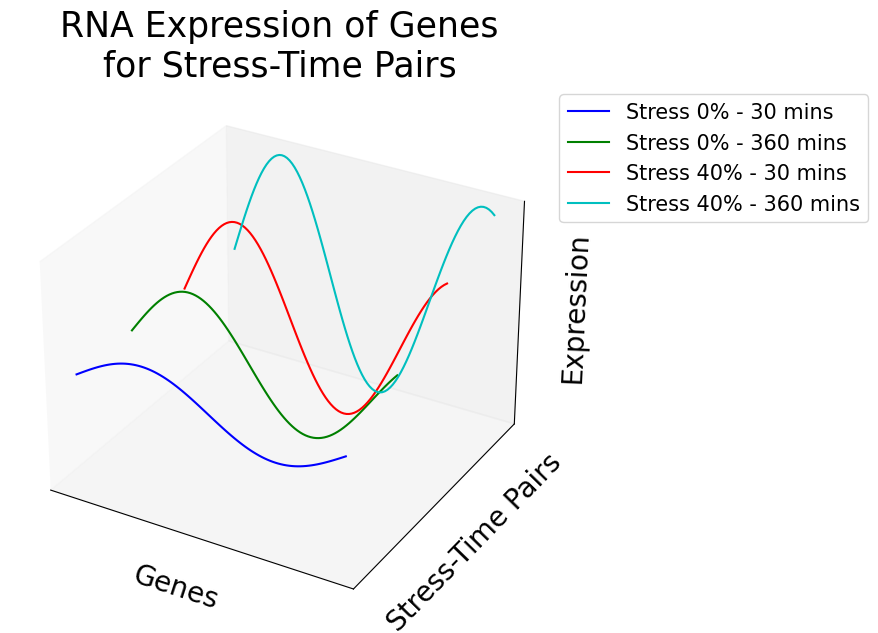

In [17]:
# Custom labels for the curves
custom_labels = [
    "Stress 0% - 30 mins", 
    "Stress 0% - 360 mins", 
    "Stress 40% - 30 mins", 
    "Stress 40% - 360 mins"
]

genes = range(4)
time_points = np.linspace(0, 2 * np.pi, 100)  # Simulated time points

# Simulate gene expression data with unique patterns for each gene
data = []
for gene in genes:
    # Adjust the sine wave for each gene (e.g., different amplitude and frequency)
    expression = np.sin(time_points * (1 + gene / 10)) * (gene + 1)
    data.append(expression)

data = np.array(data)

# Define a list of colors for the lines
colors = ['b', 'g', 'r', 'c']  # Blue, Green, Red, Cyan

# Create 3D plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each gene expression line with different colors
for idx, gene in enumerate(genes):
    # Using custom labels and colors for each gene
    label = custom_labels[idx] if idx < len(custom_labels) else f'Gene {gene}'
    color = colors[idx] if idx < len(colors) else 'k'  # Default to black if not enough colors
    ax.plot(time_points, [gene] * len(time_points), data[idx], label=label, color=color)

# Customizing the plot
ax.set_title('RNA Expression of Genes\nfor Stress-Time Pairs', fontsize = 25)
ax.set_xlabel('Genes', fontsize=20)
ax.set_ylabel('Stress-Time Pairs', fontsize=20)
ax.set_zlabel('Expression', rotation=790, fontsize=20)  # Make the z-axis label horizontal
ax.set_yticks([])  # Remove ticks on the y-axis
ax.set_xticks([])  # Remove ticks on the y-axis
ax.set_zticks([])  # Remove ticks on the y-axis

# Place a legend with the custom labels outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)
plt.show()


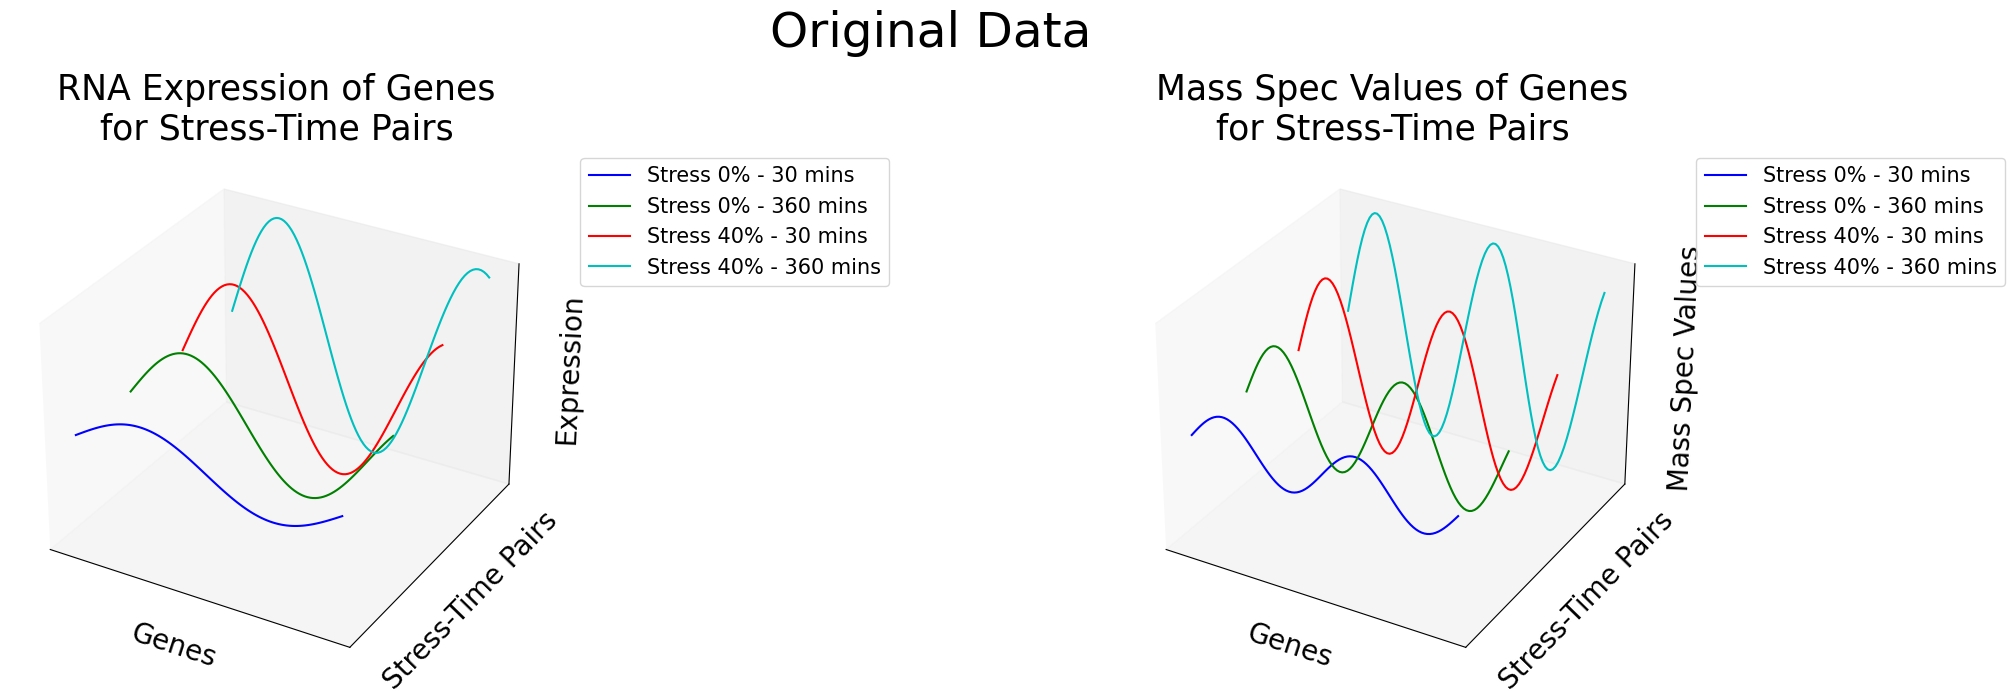

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Custom labels for the curves
custom_labels = [
    "Stress 0% - 30 mins", 
    "Stress 0% - 360 mins", 
    "Stress 40% - 30 mins", 
    "Stress 40% - 360 mins"
]

genes = range(4)
time_points = np.linspace(0, 2 * np.pi, 100)  # Simulated time points

# Simulate gene expression data with unique patterns for each gene
data = []
for gene in genes:
    # Adjust the sine wave for each gene (e.g., different amplitude and frequency)
    expression = np.sin(time_points * (1 + gene / 10)) * (gene + 1)
    data.append(expression)

data = np.array(data)


# Simulate gene expression data with unique patterns for each gene
data_massSpec = []
for gene in genes:
    # Adjust the sine wave for each gene (e.g., different amplitude and frequency)
    expression = np.sin(time_points * (2 + gene / 20)) * (gene + 1)
    data_massSpec.append(expression)

data_massSpec = np.array(data_massSpec)


# Define a list of colors for the lines
colors = ['b', 'g', 'r', 'c']  # Blue, Green, Red, Cyan

# Create a figure with two subplots
fig = plt.figure(figsize=(24, 7))
fig.suptitle('Original Data', fontsize=35)

ax1 = fig.add_subplot(121, projection='3d')  # First subplot for RNA expression
ax2 = fig.add_subplot(122, projection='3d')  # Second subplot for Zscores

# Plot RNA expression data
for idx, gene in enumerate(genes):
    label = custom_labels[idx] if idx < len(custom_labels) else f'Gene {gene}'
    color = colors[idx] if idx < len(colors) else 'k'
    ax1.plot(time_points, [gene] * len(time_points), data[idx], label=label, color=color)

# Plot mass-spec data
for idx, gene in enumerate(genes):
    label = custom_labels[idx] if idx < len(custom_labels) else f'Gene {gene}'
    color = colors[idx] if idx < len(colors) else 'k'
    ax2.plot(time_points, [gene] * len(time_points), data_massSpec[idx], label=label, color=color)

# Customizing the first plot (RNA expression)
ax1.set_title('RNA Expression of Genes\nfor Stress-Time Pairs', fontsize=25)
ax1.set_xlabel('Genes', fontsize=20)
ax1.set_ylabel('Stress-Time Pairs', fontsize=20)
ax1.set_zlabel('Expression', fontsize=20)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_zticks([])
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=15)

# Customizing the second plot (Zscores)
ax2.set_title('Mass Spec Values of Genes\nfor Stress-Time Pairs', fontsize=25)
ax2.set_xlabel('Genes', fontsize=20)
ax2.set_ylabel('Stress-Time Pairs', fontsize=20)
ax2.set_zlabel('Mass Spec Values', fontsize=20)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_zticks([])
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=15)

# Adjust the layout
plt.tight_layout()
plt.show()


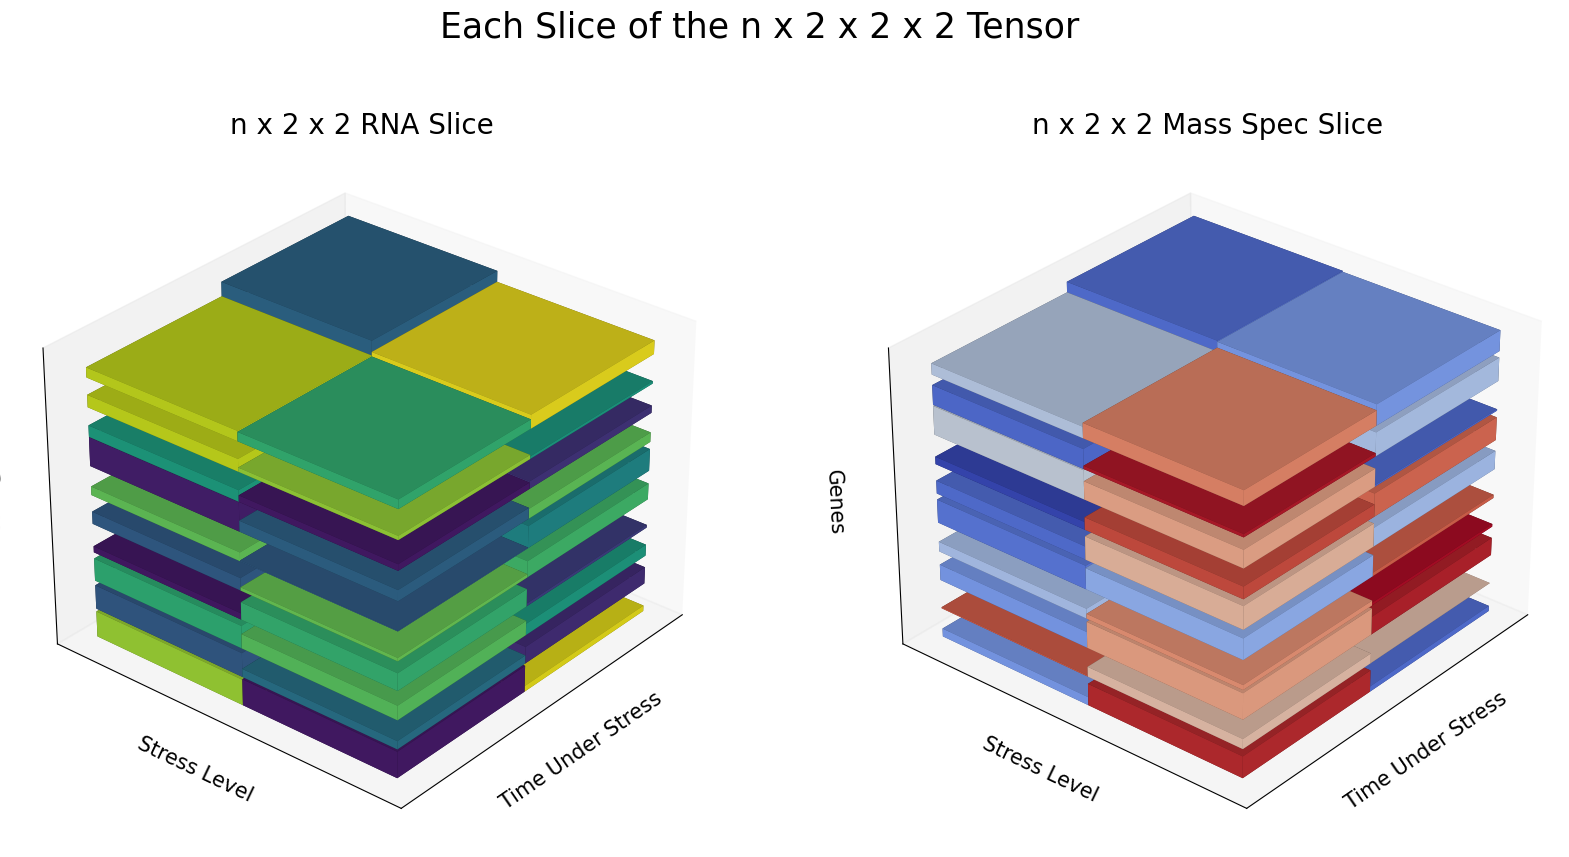

In [22]:
# Function to generate random colors for each block with different color maps
def get_random_block_colors(tensor, cmap):
    num_blocks = tensor.size
    colors = [cmap(random.random()) for _ in range(num_blocks)]
    return np.array(colors).reshape(tensor.shape + (-1,))

# Different color maps for each tensor
cmap1 = plt.cm.viridis
cmap2 = plt.cm.coolwarm

# Get random colors for each block in both tensors using different color maps
block_colors1 = get_random_block_colors(tensor1, cmap1)
block_colors2 = get_random_block_colors(tensor2, cmap2)

# Set up the figure and axes for the 3D plots
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Each Slice of the n x 2 x 2 x 2 Tensor', fontsize=35)

# First tensor plot with a unique random color for each block
ax1 = fig.add_subplot(121, projection='3d')
for i in range(tensor1.shape[0]):
    for j in range(tensor1.shape[1]):
        for k in range(tensor1.shape[2]):
            ax1.bar3d(j, k, i, 1, 1, tensor1[i, j, k], color=block_colors1[i, j, k], shade=True)

# Customizing the first plot
ax1.set_title('n x 2 x 2 RNA Slice', fontsize=25)
ax1.set_xlabel('Time Under Stress', fontsize=20)
ax1.set_ylabel('Stress Level', fontsize=20)
ax1.set_zlabel('Genes', fontsize=20)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_zticks([])
ax1.view_init(30, 220)

# Second tensor plot with a different random color scheme for each block
ax2 = fig.add_subplot(122, projection='3d')
for i in range(tensor2.shape[0]):
    for j in range(tensor2.shape[1]):
        for k in range(tensor2.shape[2]):
            ax2.bar3d(j, k, i, 1, 1, tensor2[i, j, k], color=block_colors2[i, j, k], shade=True)

# Customizing the second plot
ax2.set_title('n x 2 x 2 Mass Spec Slice', fontsize=25)
ax2.set_xlabel('Time Under Stress', fontsize=20)
ax2.set_ylabel('Stress Level', fontsize=20)
ax2.set_zlabel('Genes', fontsize=20)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_zticks([])
ax2.view_init(30, 220)

plt.show()


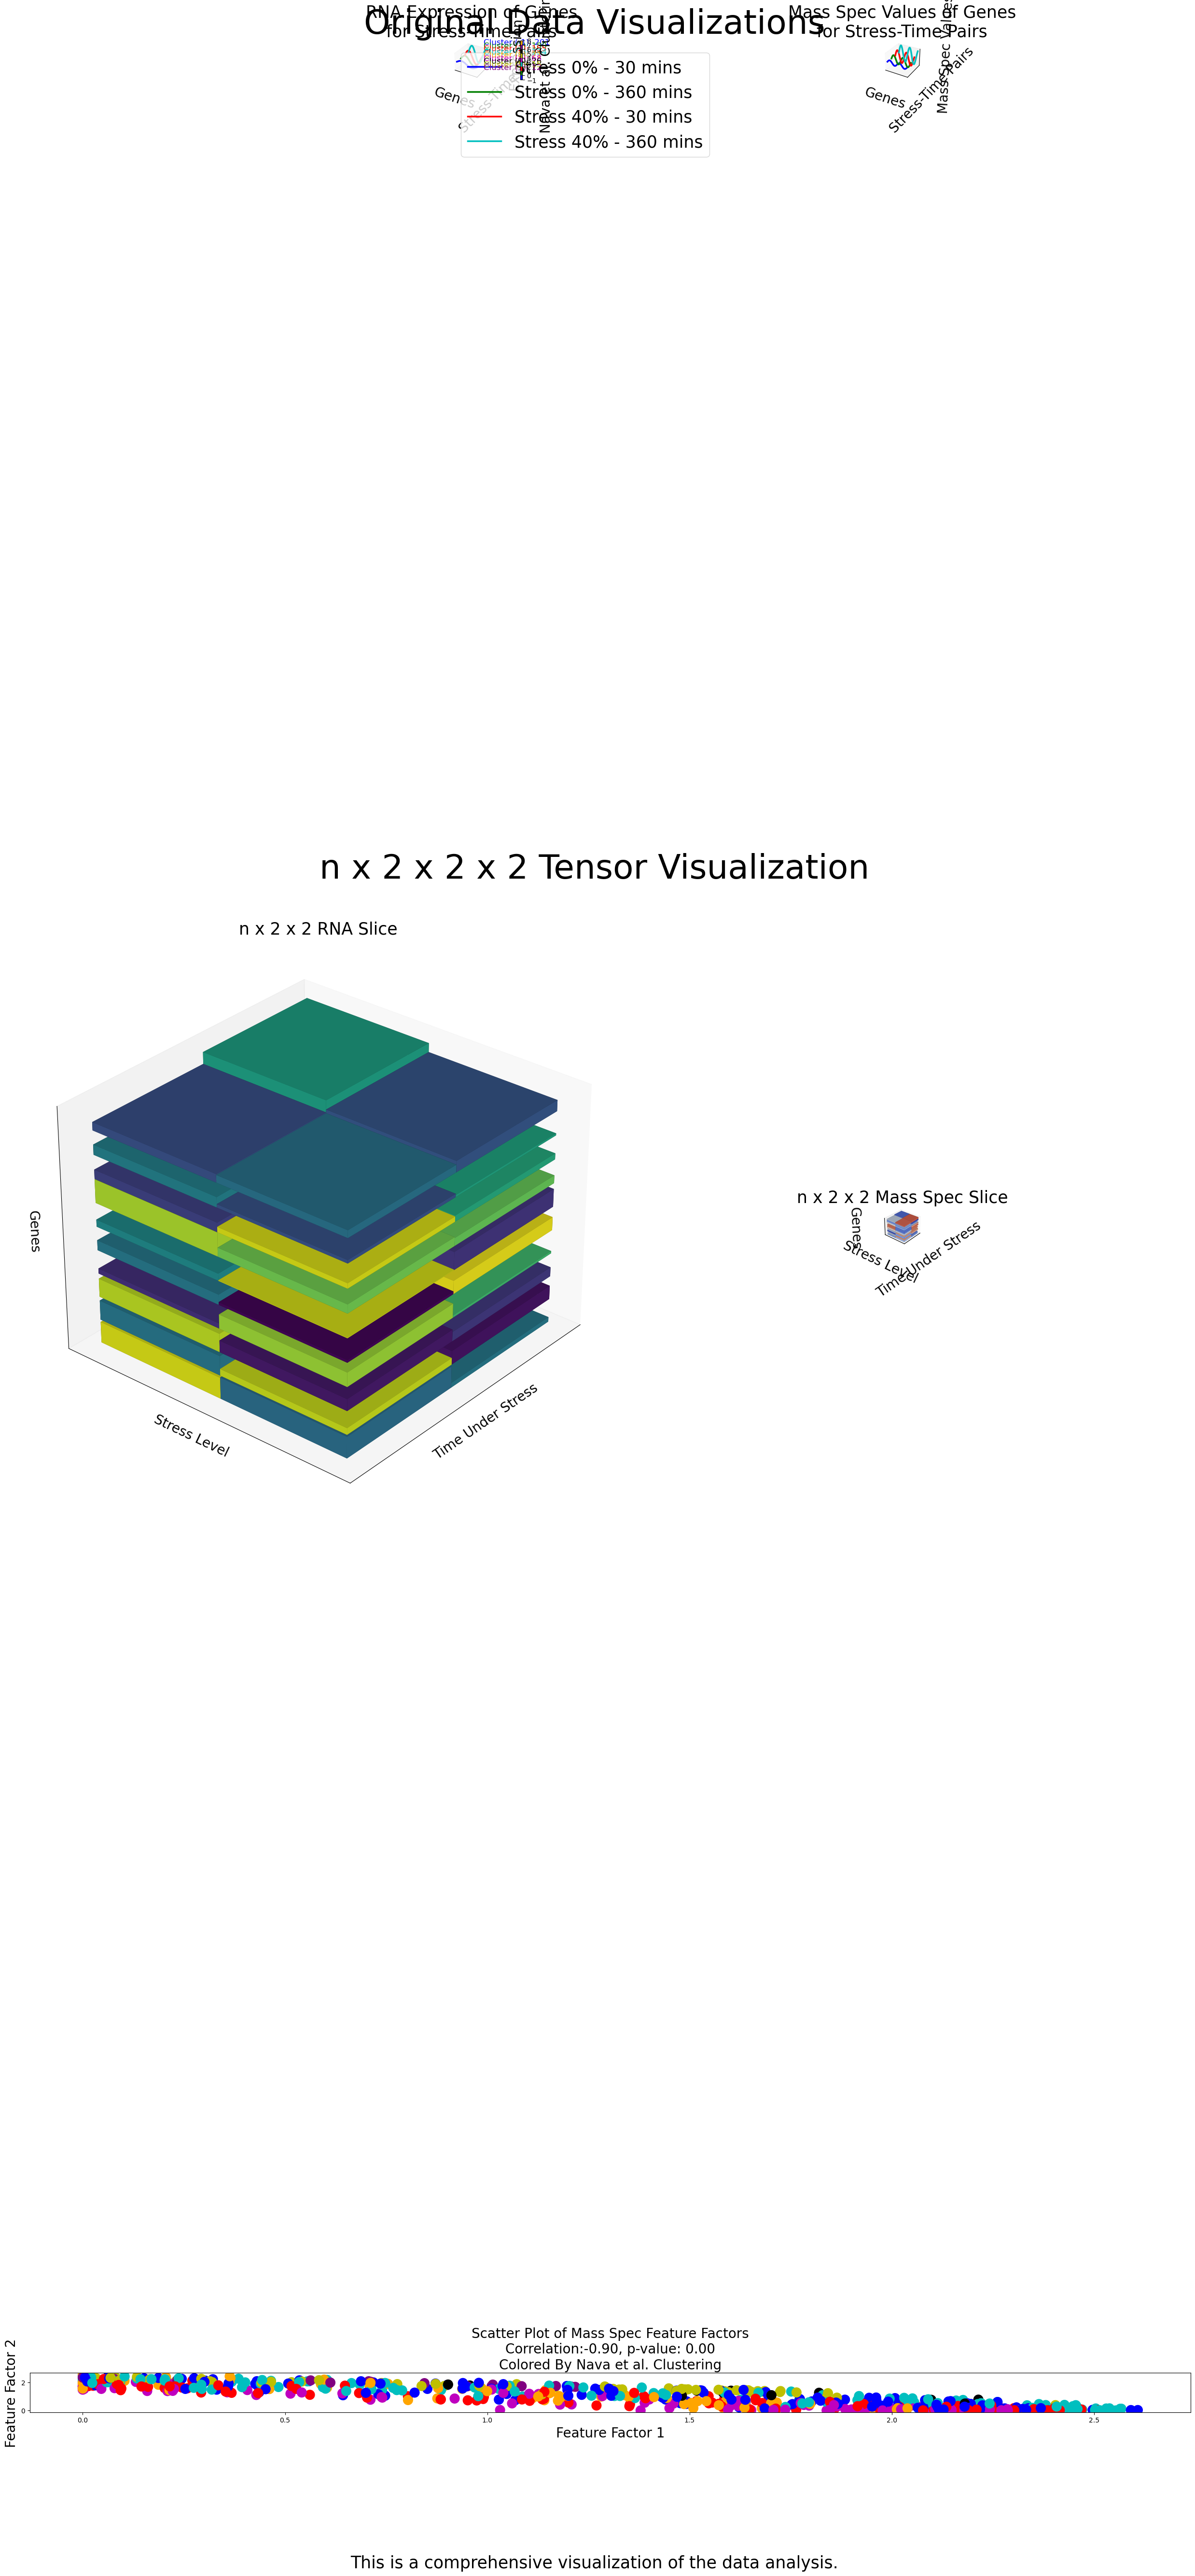

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Custom labels for the curves
custom_labels = [
    "Stress 0% - 30 mins", 
    "Stress 0% - 360 mins", 
    "Stress 40% - 30 mins", 
    "Stress 40% - 360 mins"
]

#vec1 = np.random.rand(50) 
#vec2 = np.random.rand(50)

points = np.linspace(0, 20 * np.pi, 100)
vec1 = np.cos(vec1)
vec2 = np.sin(vec1)

genes = range(4)
time_points = np.linspace(0, 2 * np.pi, 100)  # Simulated time points

# Simulate gene expression data with unique patterns for each gene
data = []
for gene in genes:
    # Adjust the sine wave for each gene (e.g., different amplitude and frequency)
    expression = np.sin(time_points * (1 + gene / 10)) * (gene + 1)
    data.append(expression)

data = np.array(data)

# Simulate gene expression data with unique patterns for each gene (Mass Spec data)
data_massSpec = []
for gene in genes:
    # Adjust the sine wave for each gene (e.g., different amplitude and frequency)
    expression = np.sin(time_points * (2 + gene / 20)) * (gene + 1)
    data_massSpec.append(expression)

data_massSpec = np.array(data_massSpec)

# Define a list of colors for the lines
colors = ['b', 'g', 'r', 'c']  # Blue, Green, Red, Cyan

# Function to generate random colors for each block with different color maps
def get_random_block_colors(tensor, cmap):
    num_blocks = tensor.size
    colors = [cmap(random.random()) for _ in range(num_blocks)]
    return np.array(colors).reshape(tensor.shape + (-1,))

# Different color maps for each tensor
cmap1 = plt.cm.viridis
cmap2 = plt.cm.coolwarm

# Get random colors for each block in both tensors using different color maps
block_colors1 = get_random_block_colors(tensor1, cmap1)
block_colors2 = get_random_block_colors(tensor2, cmap2)

# Create a single large figure with all the panels
fig = plt.figure(figsize=(25, 50))
#plt.suptitle('Tensor Visualization And Results', fontsize=55)

# Panel 1: Original Data Visualizations - RNA Expression
ax1 = fig.add_subplot(321, projection='3d')
ax2 = fig.add_subplot(322, projection='3d')

# Plot RNA expression data
for idx, gene in enumerate(genes):
    label = custom_labels[idx] if idx < len(custom_labels) else f'Gene {gene}'
    color = colors[idx] if idx < len(colors) else 'k'
    ax1.plot(time_points, [gene] * len(time_points), data[idx], label=label, color=color, linewidth=2.5)


# Plot mass-spec data
for idx, gene in enumerate(genes):
    label = custom_labels[idx] if idx < len(custom_labels) else f'Gene {gene}'
    color = colors[idx] if idx < len(colors) else 'k'
    ax2.plot(time_points, [gene] * len(time_points), data_massSpec[idx], label=label, color=color, linewidth=2.5)
   
    
# Customizing the first plot (RNA expression)
ax1.set_title('RNA Expression of Genes\nfor Stress-Time Pairs', fontsize=25)
ax1.set_xlabel('Genes', fontsize=20)
ax1.set_ylabel('Stress-Time Pairs', fontsize=20)
ax1.set_zlabel('Expression', fontsize=20)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_zticks([])
ax1.legend(loc='upper left', bbox_to_anchor=(.01, .9), fontsize=25)

# Customizing the second plot (Mass Spec Values)
ax2.set_title('Mass Spec Values of Genes\nfor Stress-Time Pairs', fontsize=25)
ax2.set_xlabel('Genes', fontsize=20)
ax2.set_ylabel('Stress-Time Pairs', fontsize=20)
ax2.set_zlabel('Mass Spec Values', fontsize=20)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_zticks([])

# Panel 2: Original Data Visualizations - Mass Spec Values
ax3 = fig.add_subplot(323, projection='3d')
ax4 = fig.add_subplot(324, projection='3d')

# First tensor plot with a unique random color for each block
ax3 = fig.add_subplot(121, projection='3d')
for i in range(tensor1.shape[0]):
    for j in range(tensor1.shape[1]):
        for k in range(tensor1.shape[2]):
            ax3.bar3d(j, k, i, 1, 1, tensor1[i, j, k], color=block_colors1[i, j, k], shade=True)

# Customizing the first plot
ax3.set_title('n x 2 x 2 RNA Slice', fontsize=25)
ax3.set_xlabel('Time Under Stress', fontsize=20)
ax3.set_ylabel('Stress Level', fontsize=20)
ax3.set_zlabel('Genes', fontsize=20)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_zticks([])
ax3.view_init(30, 220)

# Second tensor plot with a different random color scheme for each block

for i in range(tensor2.shape[0]):
    for j in range(tensor2.shape[1]):
        for k in range(tensor2.shape[2]):
            ax4.bar3d(j, k, i, 1, 1, tensor2[i, j, k], color=block_colors2[i, j, k], shade=True)

# Customizing the second plot
ax4.set_title('n x 2 x 2 Mass Spec Slice', fontsize=25)
ax4.set_xlabel('Time Under Stress', fontsize=20)
ax4.set_ylabel('Stress Level', fontsize=20)
ax4.set_zlabel('Genes', fontsize=20)
ax4.set_yticks([])
ax4.set_xticks([])
ax4.set_zticks([])
ax4.view_init(30, 220)









# Panel 4: Low Rank Decomposition Scatter Plot
ax5 = fig.add_subplot(313)

mat_data = scipy.io.loadmat('/home/dwk681/workspace/GSE143519/Workspaces/translated_structuredData_massSpec_RNA_first10_800iterations_zscores.mat')
sol_factors = mat_data['sol_factors']
feature_factor1 = sol_factors[0][2][0][3][:,1]
feature_factor2 = sol_factors[0][2][0][3][:,2]

correlation, p_value = pearsonr(feature_factor1, feature_factor2)
cluster_colors = ListedColormap(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange'])
scatter = ax5.scatter(feature_factor1, feature_factor2, c=updated_cluster_id_vector, cmap=cluster_colors, s =200)
ax5.set_title(f'Scatter Plot of Mass Spec Feature Factors\nCorrelation:{correlation:.2f}, p-value: {p_value:.2f}\nColored By Nava et al. Clustering', fontsize=20)
cbar = plt.colorbar(scatter, ax=ax1, ticks=range(-1,9))
cbar.set_label('Nava et al. Clustering', fontsize=20)


cluster_sizes = cluster_ids.value_counts().to_dict()

# Create a dictionary to map cluster ID to the index used in cluster_colors
color_index_map = {id: index for index, id in enumerate(sorted(cluster_sizes.keys()))}

# Initialize a variable for the y-offset of the cluster size text
text_y_offset = 0.9

# Adjust the label text to reflect the cluster sizes
for i, size in cluster_sizes.items():
    label_text = f'Cluster {i}: {size}' if i != -1 else f'Noise: {size}'

    # Remove the comma by formatting the number as a string
    label_text = label_text.replace(',', '')    
    # Get the color index from the map
    color_index = color_index_map[i]
    
    # Look up the color using the color index
    color = cluster_colors.colors[color_index]
    
    # Place the text on the plot
    ax5.text(0.8, text_y_offset, label_text, transform=ax1.transAxes, fontsize=12, color=color)
    
    # Update the y-offset for the next label
    text_y_offset -= 0.08
# Calculate the size of each cluster
#cluster_sizes = [np.sum(cluster_ids == i) for i in range(-1,9)]  

# Display the size of each cluster
#for i, size in enumerate(cluster_sizes):
#    ax1.text(0.8, 0.9 - i * 0.08, f'Cluster {i+1}: {size}', transform=ax1.transAxes, fontsize=12, color=cluster_colors(i))

ax5.set_xlabel('Feature Factor 1', fontsize=20)
ax5.set_ylabel('Feature Factor 2', fontsize=20)



# Title for the first two plots
fig.text(0.5, 1, 'Original Data Visualizations', ha='center', fontsize=50)
# Title for the second two plots
fig.text(0.5, 0.65, 'n x 2 x 2 x 2 Tensor Visualization', ha='center', fontsize=50)

# Caption
fig.text(0.5, -0.05, 'This is a comprehensive visualization of the data analysis.', ha='center', fontsize=25)

# Adjust the layout
plt.tight_layout()

plt.show()


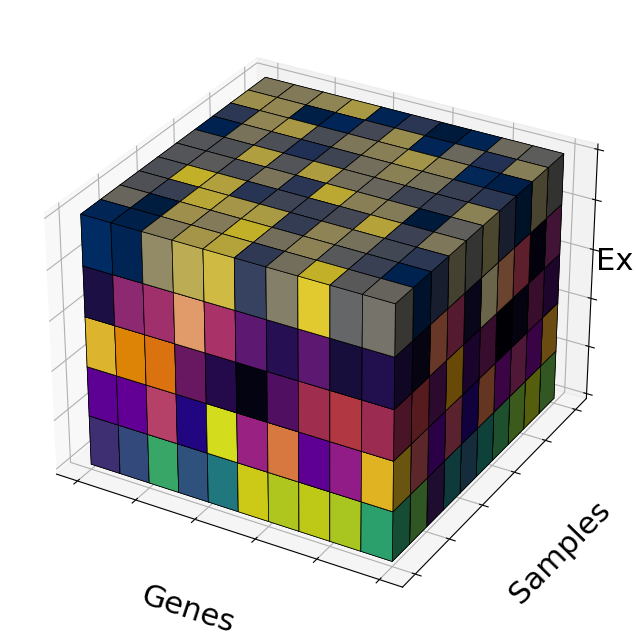

'/home/dwk681/workspace/3d_tensor_largest_labels.png'

In [104]:
# Adjust the function to use an even larger font size for the axis labels and orient the "Experiment" label horizontally

def draw_colored_3d_tensor_largest_labels_and_save(ax, filename):
    # Define the size of the tensor in each dimension
    size_genes = 10  # Size along the 'Genes' axis
    size_samples = 10  # Size along the 'Samples' axis
    size_experiment = 5  # Size along the 'Experiment' axis

    # Define colormaps for each 'Experiment' slice
    colormaps = [plt.cm.viridis, plt.cm.plasma, plt.cm.inferno, plt.cm.magma, plt.cm.cividis]

    # Draw the tensor slices with distinct random colors
    for i in range(size_experiment):
        # Get the colormap for the current slice
        cmap = colormaps[i]
        # Generate random indices for the colormap
        random_indices = np.random.choice(256, size_genes * size_samples)
        for j in range(size_genes):
            for k in range(size_samples):
                # Pick a random color for each block within the current slice
                color = cmap(random_indices[j * size_samples + k])
                
                # Draw a cube at the position (j, k, i)
                ax.bar3d(j, k, i, 1, 1, 1, color=color, edgecolor='k', linewidth=0.5, shade=True)
    
    # Set the labels for each axis with the largest font size
    ax.set_xlabel('Genes', fontsize=22, labelpad=20)
    ax.set_ylabel('Samples', fontsize=22, labelpad=20)
    ax.set_zlabel('Experiment', fontsize=22, labelpad=20)
    
    # Rotate the 'Experiment' label to be horizontal
    ax.zaxis.set_rotate_label(False)  # Disable automatic rotation
    ax.zaxis.label.set_rotation(0)  # Set to zero degrees (horizontal)
    
    # Remove the numbering on the ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    # Save the figure to the specified file
    plt.savefig(filename)

# Create a new figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Filepath to save the image
filename = '/home/dwk681/workspace/3d_tensor_largest_labels.png'

# Call the function to draw and save the tensor with the largest labels and horizontal "Experiment" label
draw_colored_3d_tensor_largest_labels_and_save(ax, filename)

# Show the plot
plt.show()

# Return the filepath for download
filename
